# Rainfall Prediction - Weather Forecasting

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
plt.style.use('fivethirtyeight') # Good looking plots
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, poisson, ols
from sklearn import datasets
from scipy.stats import expon,norm,boxcox
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso,Ridge,RidgeCV
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd   #importing Libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#For Data loading and preprocessing
import pandas as pd

#For matrix operations
import numpy as np

#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For splitting the data
from sklearn.model_selection import train_test_split

#For data preprocessing
from sklearn.preprocessing import StandardScaler

#For hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
#For appling LogisticRegression
from sklearn.linear_model import LogisticRegression

#For model/vatiable persistence 
#from sklearn.externals import joblib
import joblib
#For math operations
import math 

#To see the progress of the iterations
#from tqdm import tqdm

#Performance metrices
from sklearn.metrics import roc_auc_score,roc_curve,auc,log_loss,confusion_matrix

#For encoding the features
from sklearn.preprocessing import LabelEncoder,LabelBinarizer

#For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
#import the dataset

data = pd.read_csv('/Users/rakeshchandramaity/Desktop/ml/weather_aus.csv')

print("Total no.of points = {}".format(data.shape[0]))
data.head(5)

Total no.of points = 8425


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01/12/2008   Albury     13.4     22.9       0.6          NaN       NaN   
1  02/12/2008   Albury      7.4     25.1       0.0          NaN       NaN   
2  03/12/2008   Albury     12.9     25.7       0.0          NaN       NaN   
3  04/12/2008   Albury      9.2     28.0       0.0          NaN       NaN   
4  05/12/2008   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [6]:
import joblib

# 1. Doing  Exploratory Data Analysis

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.isnull().any()

Date             False
Location         False
MinTemp           True
MaxTemp           True
Rainfall          True
Evaporation       True
Sunshine          True
WindGustDir       True
WindGustSpeed     True
WindDir9am        True
WindDir3pm        True
WindSpeed9am      True
WindSpeed3pm      True
Humidity9am       True
Humidity3pm       True
Pressure9am       True
Pressure3pm       True
Cloud9am          True
Cloud3pm          True
Temp9am           True
Temp3pm           True
RainToday         True
RainTomorrow      True
dtype: bool

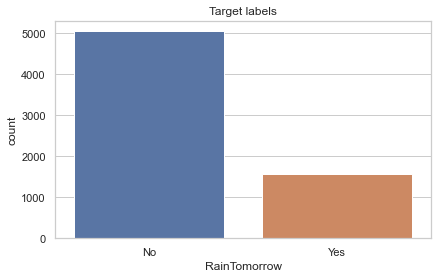

In [9]:
sns.set(style="whitegrid")
sns.countplot(data.RainTomorrow)
plt.title("Target labels")
plt.show()

In [10]:
#Separating the data based on its class label.
data_yes = data[data['RainTomorrow']=='Yes']
data_no = data[data['RainTomorrow']=='No']

In [11]:
#Observing the mode for all columns when RainTomorrow = Yes  
mode_values_for_yes = data_yes.mode()
mode_values_for_yes

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0   01/06/2009  PerthAirport     13.2     19.0       0.0          2.6   
1   01/06/2014           NaN      NaN      NaN       NaN          NaN   
2   02/04/2009           NaN      NaN      NaN       NaN          NaN   
3   02/06/2009           NaN      NaN      NaN       NaN          NaN   
4   03/04/2009           NaN      NaN      NaN       NaN          NaN   
5   03/05/2012           NaN      NaN      NaN       NaN          NaN   
6   03/06/2009           NaN      NaN      NaN       NaN          NaN   
7   03/09/2010           NaN      NaN      NaN       NaN          NaN   
8   04/02/2010           NaN      NaN      NaN       NaN          NaN   
9   04/05/2010           NaN      NaN      NaN       NaN          NaN   
10  04/09/2010           NaN      NaN      NaN       NaN          NaN   
11  05/02/2010           NaN      NaN      NaN       NaN          NaN   
12  05/03/2010           NaN      NaN      NaN       NaN          NaN   
13  06/10/2010           NaN      NaN      NaN       NaN          NaN   
14  07/03/2010           NaN      NaN      NaN       NaN          NaN   
15  09/06/2014           NaN      NaN      NaN       NaN          NaN   
16  09/08/2010           NaN      NaN      NaN       NaN          NaN   
17  09/09/2010           NaN      NaN      NaN       NaN          NaN   
18  09/09/2014           NaN      NaN      NaN       NaN          NaN   
19  10/02/2011           NaN      NaN      NaN       NaN          NaN   
20  10/08/2010           NaN      NaN      NaN       NaN          NaN   
21  10/12/2014           NaN      NaN      NaN       NaN          NaN   
22  11/04/2009           NaN      NaN      NaN       NaN          NaN   
23  13/03/2011           NaN      NaN      NaN       NaN          NaN   
24  14/03/2009           NaN      NaN      NaN       NaN          NaN   
25  15/10/2010           NaN      NaN      NaN       NaN          NaN   
26  16/02/2011           NaN      NaN      NaN       NaN          NaN   
27  16/08/2014           NaN      NaN      NaN       NaN          NaN   
28  19/06/2011           NaN      NaN      NaN       NaN          NaN   
29  19/12/2010           NaN      NaN      NaN       NaN          NaN   
30  20/06/2009           NaN      NaN      NaN       NaN          NaN   
31  20/06/2014           NaN      NaN      NaN       NaN          NaN   
32  21/06/2009           NaN      NaN      NaN       NaN          NaN   
33  22/12/2014           NaN      NaN      NaN       NaN          NaN   
34  23/05/2011           NaN      NaN      NaN       NaN          NaN   
35  25/07/2014           NaN      NaN      NaN       NaN          NaN   
36  28/05/2010           NaN      NaN      NaN       NaN          NaN   
37  28/07/2010           NaN      NaN      NaN       NaN          NaN   
38  28/11/2009           NaN      NaN      NaN       NaN          NaN   
39  31/07/2010           NaN      NaN      NaN       NaN          NaN   

    Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0        0.0           N           37.0          N  ...        91.0   
1        NaN         NaN            NaN        NaN  ...         NaN   
2        NaN         NaN            NaN        NaN  ...         NaN   
3        NaN         NaN            NaN        NaN  ...         NaN   
4        NaN         NaN            NaN        NaN  ...         NaN   
5        NaN         NaN            NaN        NaN  ...         NaN   
6        NaN         NaN            NaN        NaN  ...         NaN   
7        NaN         NaN            NaN        NaN  ...         NaN   
8        NaN         NaN            NaN        NaN  ...         NaN   
9        NaN         NaN            NaN        NaN  ...         NaN   
10       NaN         NaN            NaN        NaN  ...         NaN   
11       NaN         NaN            NaN        NaN  ...         NaN   
12       NaN         NaN            NaN        NaN  ...         NaN   
13       NaN         N

In [13]:
#Now Observing the mode for all columns when RainTomorrow = No  
mode_values_for_no = data_no.mode()
mode_values_for_no

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0   02/05/2011  PerthAirport     12.0     20.0       0.0          4.0   
1   02/06/2011           NaN      NaN      NaN       NaN          NaN   
2   04/05/2011           NaN      NaN      NaN       NaN          NaN   
3   05/05/2011           NaN      NaN      NaN       NaN          NaN   
4   06/03/2011           NaN      NaN      NaN       NaN          NaN   
5   06/05/2011           NaN      NaN      NaN       NaN          NaN   
6   06/06/2011           NaN      NaN      NaN       NaN          NaN   
7   07/03/2011           NaN      NaN      NaN       NaN          NaN   
8   07/05/2011           NaN      NaN      NaN       NaN          NaN   
9   07/06/2014           NaN      NaN      NaN       NaN          NaN   
10  08/06/2014           NaN      NaN      NaN       NaN          NaN   
11  09/02/2011           NaN      NaN      NaN       NaN          NaN   
12  10/06/2014           NaN      NaN      NaN       NaN          NaN   
13  11/03/2011           NaN      NaN      NaN       NaN          NaN   
14  11/06/2014           NaN      NaN      NaN       NaN          NaN   
15  12/03/2011           NaN      NaN      NaN       NaN          NaN   
16  14/02/2011           NaN      NaN      NaN       NaN          NaN   
17  15/03/2011           NaN      NaN      NaN       NaN          NaN   
18  15/05/2011           NaN      NaN      NaN       NaN          NaN   
19  16/03/2011           NaN      NaN      NaN       NaN          NaN   
20  16/05/2011           NaN      NaN      NaN       NaN          NaN   
21  17/03/2011           NaN      NaN      NaN       NaN          NaN   
22  18/05/2011           NaN      NaN      NaN       NaN          NaN   
23  21/01/2011           NaN      NaN      NaN       NaN          NaN   
24  21/03/2011           NaN      NaN      NaN       NaN          NaN   
25  22/01/2011           NaN      NaN      NaN       NaN          NaN   
26  22/02/2011           NaN      NaN      NaN       NaN          NaN   
27  22/03/2011           NaN      NaN      NaN       NaN          NaN   
28  23/06/2011           NaN      NaN      NaN       NaN          NaN   
29  24/01/2011           NaN      NaN      NaN       NaN          NaN   
30  25/03/2011           NaN      NaN      NaN       NaN          NaN   
31  25/05/2011           NaN      NaN      NaN       NaN          NaN   
32  25/06/2011           NaN      NaN      NaN       NaN          NaN   
33  26/01/2011           NaN      NaN      NaN       NaN          NaN   
34  26/02/2011           NaN      NaN      NaN       NaN          NaN   
35  26/03/2011           NaN      NaN      NaN       NaN          NaN   
36  27/01/2011           NaN      NaN      NaN       NaN          NaN   
37  27/03/2011           NaN      NaN      NaN       NaN          NaN   
38  27/05/2011           NaN      NaN      NaN       NaN          NaN   
39  28/01/2011           NaN      NaN      NaN       NaN          NaN   
40  28/02/2011           NaN      NaN      NaN       NaN          NaN   
41  28/05/2011           NaN      NaN      NaN       NaN          NaN   
42  31/03/2011           NaN      NaN      NaN       NaN          NaN   

    Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0       11.0           E           35.0         SW  ...        68.0   
1        NaN         NaN            NaN        NaN  ...        73.0   
2        NaN         NaN            NaN        NaN  ...         NaN   
3        NaN         NaN            NaN        NaN  ...         NaN   
4        NaN         NaN            NaN        NaN  ...         NaN   
5        NaN         NaN            NaN        NaN  ...         NaN   
6        NaN         NaN            NaN        NaN  ...         NaN   
7        NaN         NaN            NaN        NaN  ...         NaN   
8        NaN         NaN            NaN        NaN  ...         NaN   
9        NaN         NaN            NaN        NaN  ...         NaN   
10       NaN    

In [14]:
data_no['MaxTemp'].median()

24.1

In [15]:
#For Temparatures we cannot replace NaN values with 0, hence replacing NaN with its respective mode value
data_yes['MinTemp'].fillna(value=data_yes['MinTemp'].mode()[0],inplace=True )
data_no['MinTemp'].fillna(value=data_no['MinTemp'].mode()[0],inplace=True )

data_yes['MaxTemp'].fillna(value=data_yes['MaxTemp'].mode()[0],inplace=True )
data_no['MaxTemp'].fillna(value=data_no['MaxTemp'].mode()[0],inplace=True )


data_yes['Temp9am'].fillna(value=data_yes['Temp9am'].mode()[0],inplace=True )
data_no['Temp9am'].fillna(value=data_no['Temp9am'].mode()[0],inplace=True )

data_yes['Temp3pm'].fillna(value=data_yes['Temp3pm'].mode()[0],inplace=True )
data_no['Temp3pm'].fillna(value=data_no['Temp3pm'].mode()[0],inplace=True )


# For humidity also 
data_yes['Humidity9am'].fillna(value=data_yes['Humidity9am'].mode()[0],inplace=True )
data_no['Humidity9am'].fillna(value=data_no['Humidity9am'].mode()[0],inplace=True )



data_yes['Humidity3pm'].fillna(value=data_yes['Humidity3pm'].mode()[0],inplace=True )
data_no['Humidity3pm'].fillna(value=data_no['Humidity3pm'].mode()[0],inplace=True )

# For the rain fall feature we can replace NaN with 0.0 which says there is no rain fall
data_yes['Rainfall'].fillna(value=0.0,inplace=True)
data_no['Rainfall'].fillna(value=0.0,inplace=True)


data_yes['Pressure9am'].fillna(value=data_yes['Pressure9am'].median(),inplace=True )
data_no['Pressure9am'].fillna(value=data_no['Pressure9am'].median(),inplace=True )

data_yes['Pressure3pm'].fillna(value=data_yes['Pressure3pm'].median(),inplace=True )
data_no['Pressure3pm'].fillna(value=data_no['Pressure3pm'].median(),inplace=True )


data_yes['WindSpeed9am'].fillna(value=data_yes['WindSpeed9am'].median(),inplace=True )
data_no['WindSpeed9am'].fillna(value=data_no['WindSpeed9am'].median(),inplace=True )

data_yes['WindSpeed3pm'].fillna(value=data_yes['WindSpeed3pm'].median(),inplace=True )
data_no['WindSpeed3pm'].fillna(value=data_no['WindSpeed3pm'].median(),inplace=True )

#WindGustSpeed -- replacing with median
data_yes['WindGustSpeed'].fillna(value=data_yes['WindGustSpeed'].median(),inplace=True)
data_no['WindGustSpeed'].fillna(value=data_no['WindGustSpeed'].median(),inplace=True)

In [16]:
# For RainToday feature it's tough to fill any value, so its better to remove the NaN values 
data_yes.dropna(inplace=True)
data_no.dropna(inplace=True)

In [17]:
data_filled= data_yes.append(data_no, ignore_index=True)

In [18]:
data_filled.isnull().any()

Date             False
Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
Evaporation      False
Sunshine         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Cloud9am         False
Cloud3pm         False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
dtype: bool

In [19]:

print("Percentage of removed points= {}%".format(100.00-(len(data_filled)*100/len(data))))

Percentage of removed points= 53.519668737060044%


In [20]:
# sorting the data based on data (Time based splitting)
data_filled=data_filled.sort_values(by='Date')

In [21]:
#Removing unwanted features, RISK_MM is same as target label hence removing with data and loaction  
data_final = data_filled.drop(['Date', 'Location'], axis=1)

In [22]:
data_final.shape

(3143, 21)

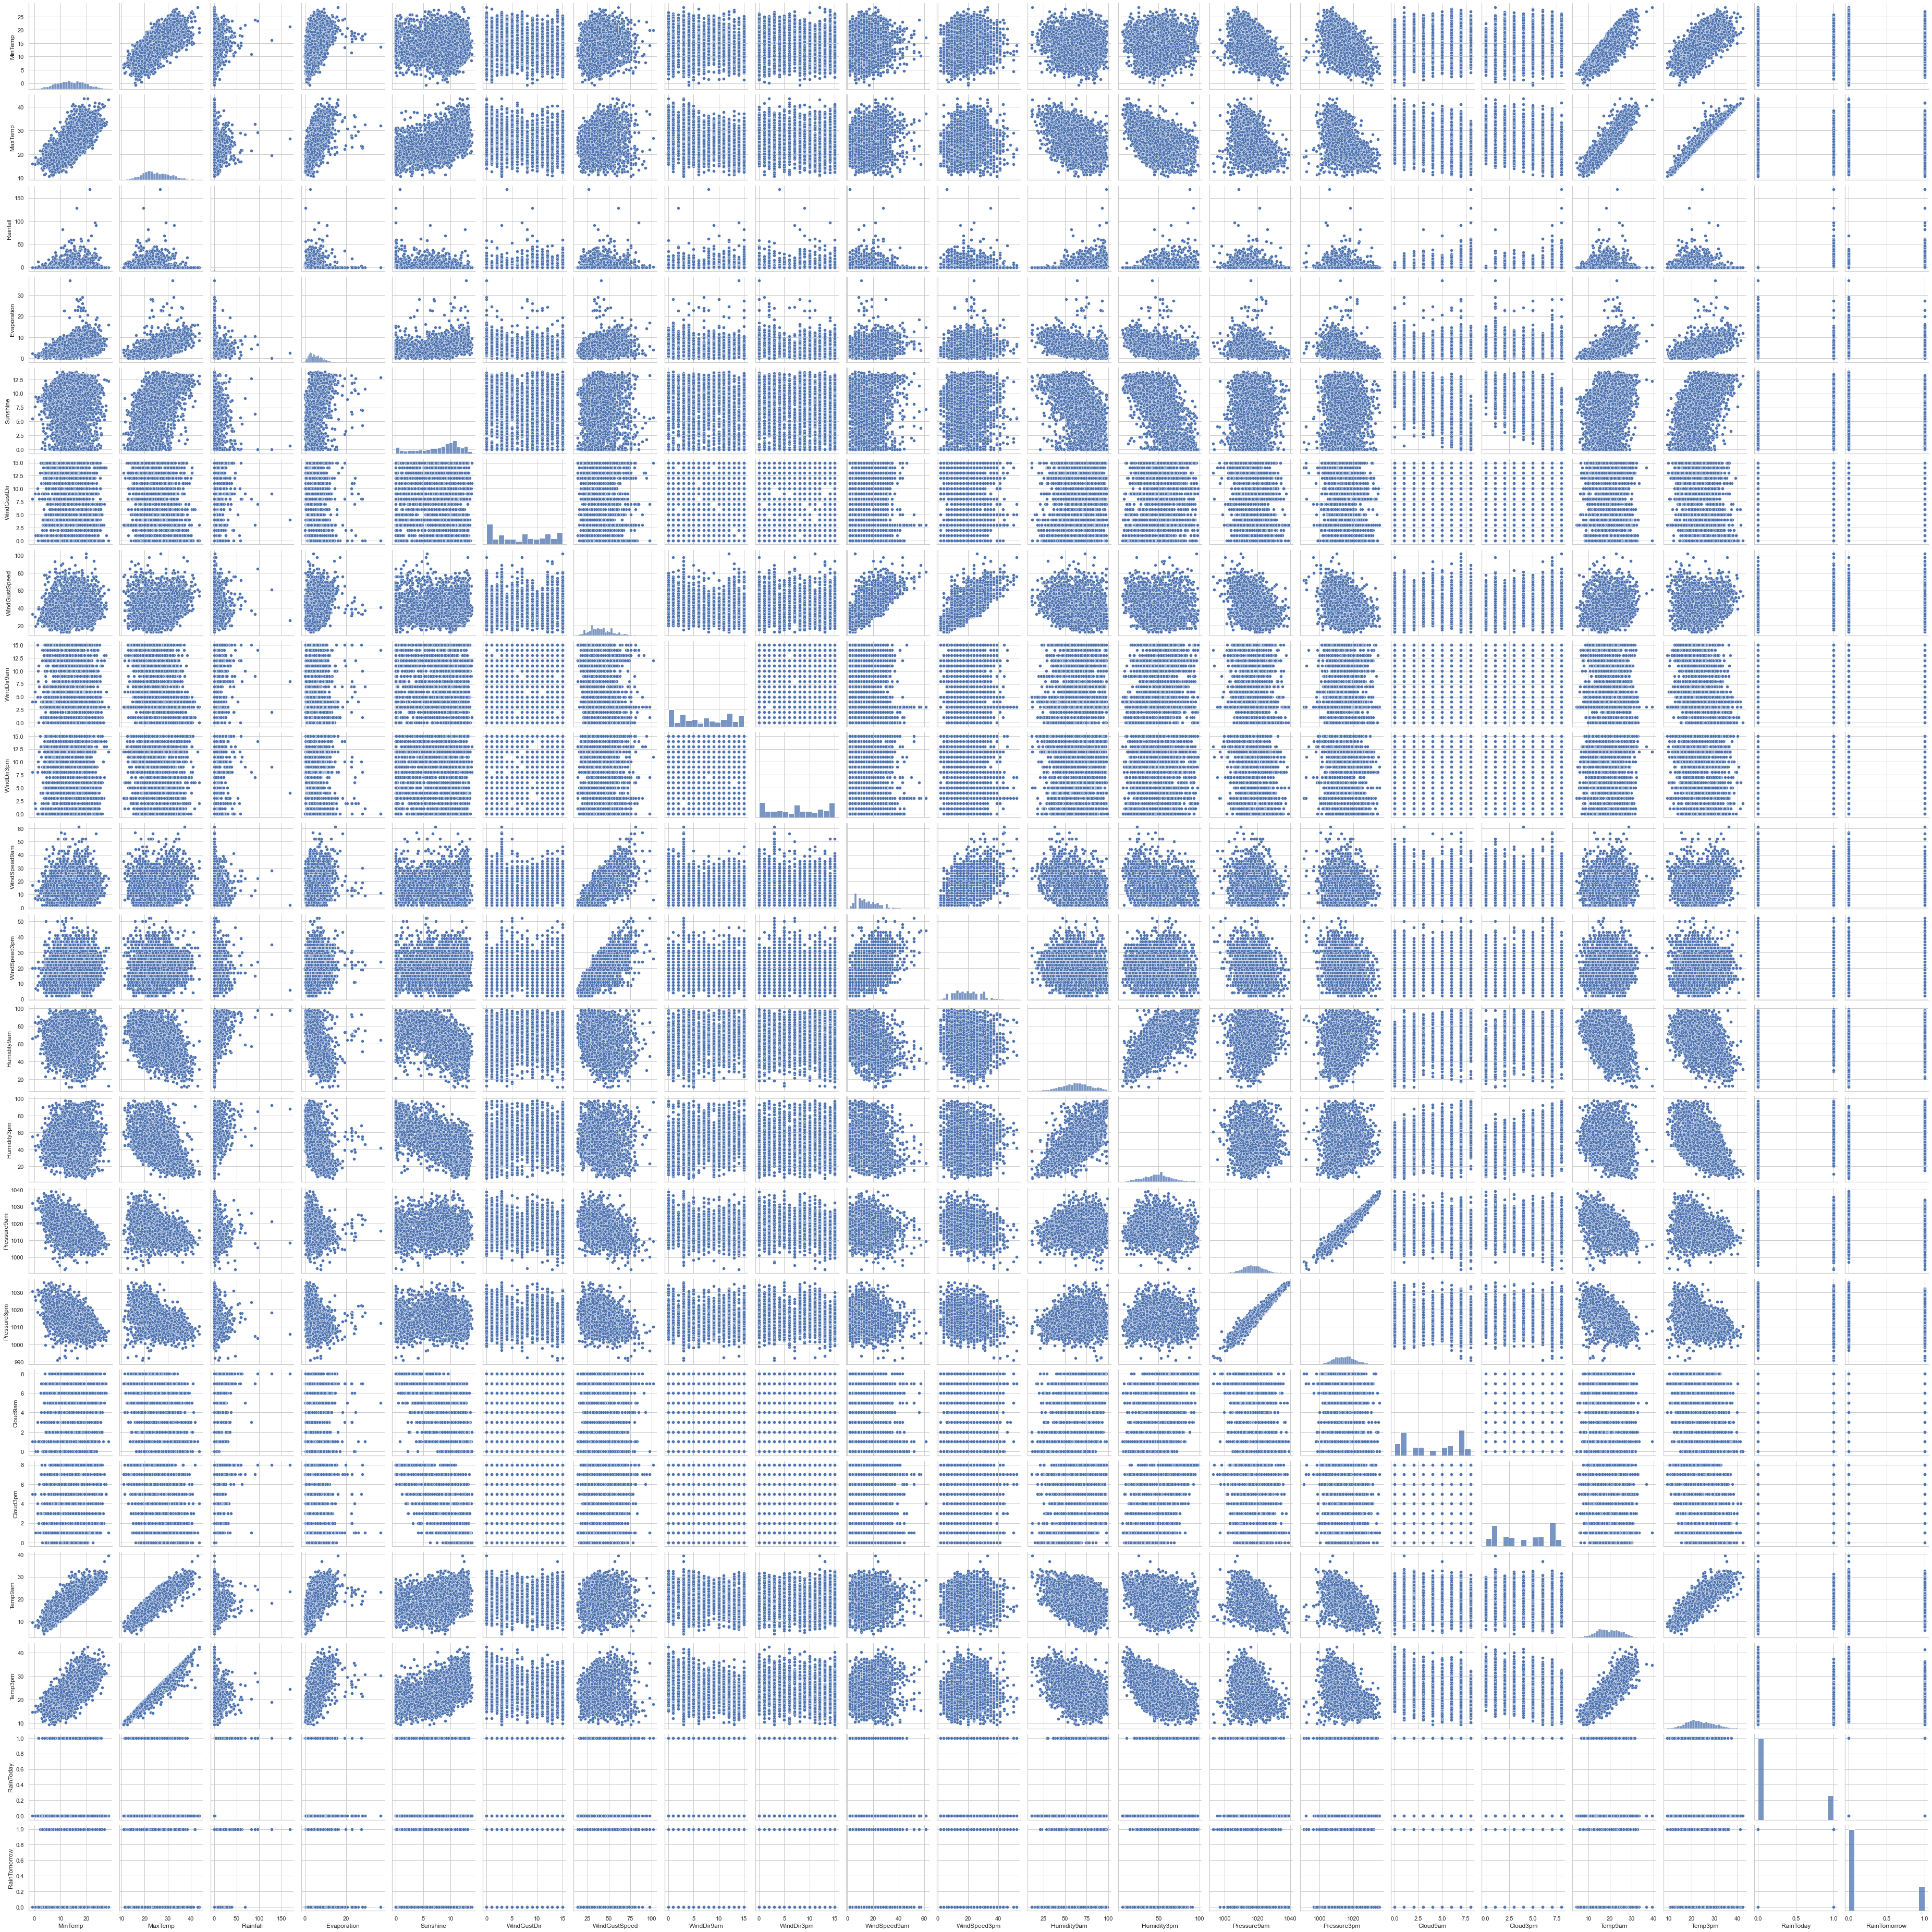

In [67]:
#pairplot
import seaborn as sns
sns.pairplot(data_final)

<AxesSubplot:>

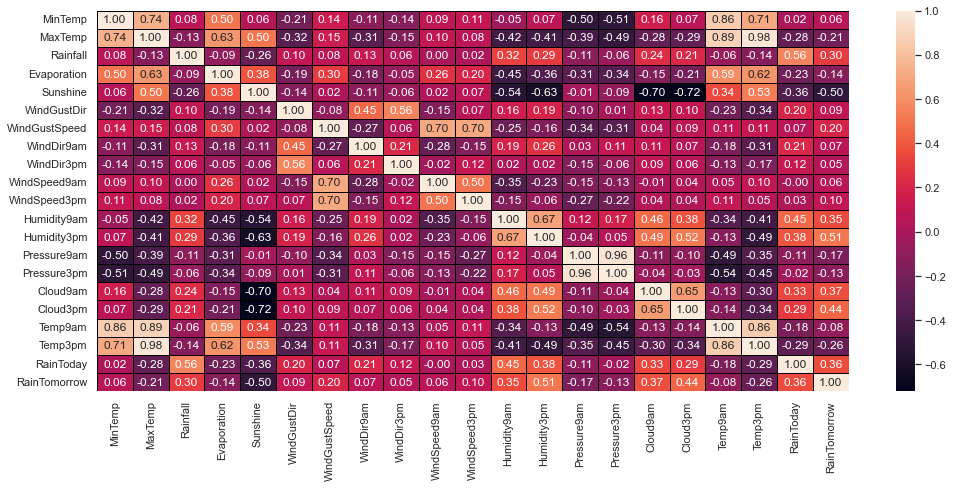

In [68]:
##  Now checking Corelation with the help og Hit Map
plt.figure(figsize=(15,7))
sns.heatmap(data_final.corr(),annot=True,linewidths=0.5,linecolor='black',fmt= '.2f')

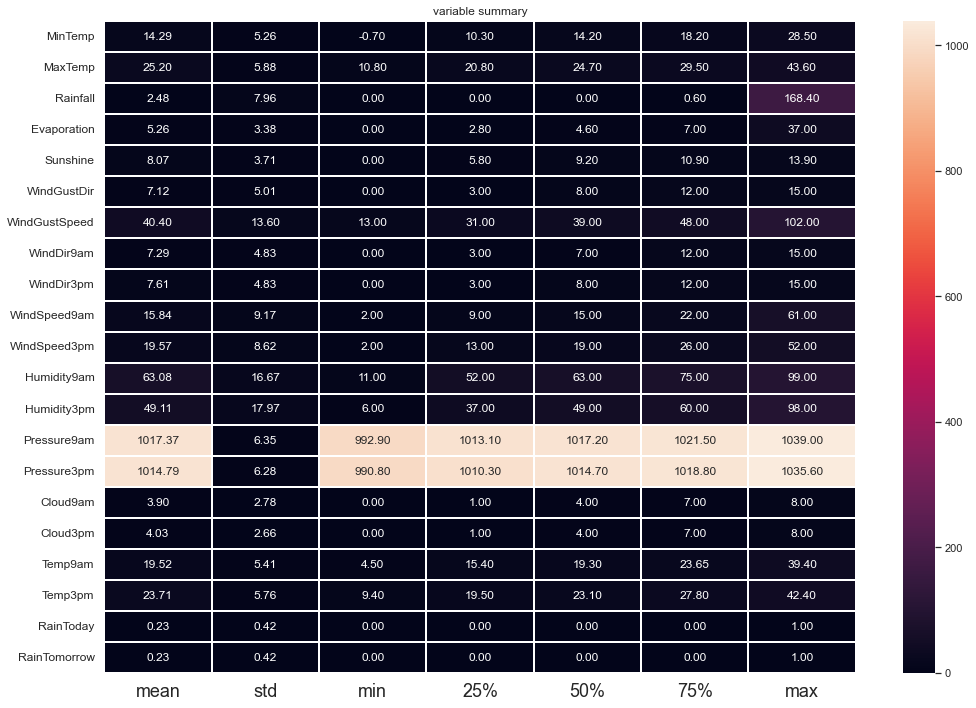

In [69]:
## Need to Check Distributions of Variables with in a hit map.
## Which will give us clear understanding about the variables.

plt.figure(figsize=(15,12))
sns.heatmap(round(data_final.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("variable summary")
plt.show()

<AxesSubplot:>

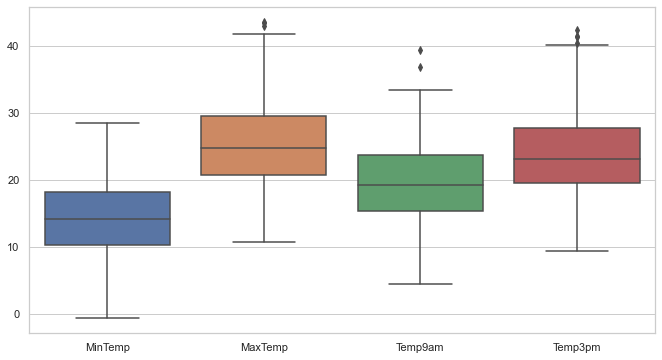

In [24]:
#Outliers checking for numerical features
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

<AxesSubplot:>

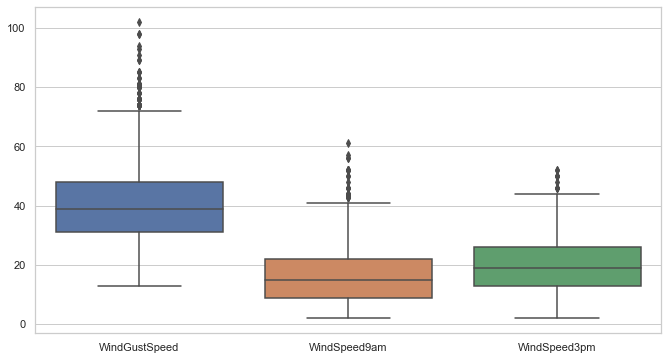

In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']])

<AxesSubplot:>

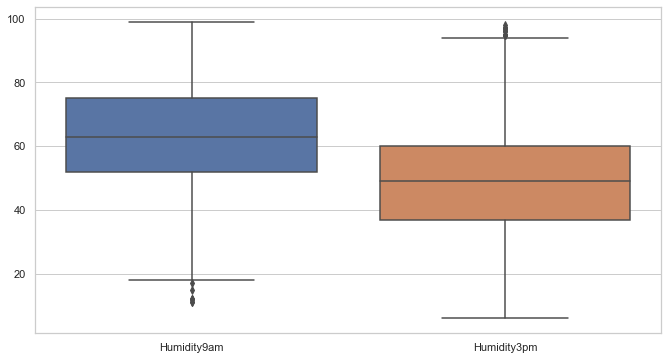

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Humidity9am','Humidity3pm']])

In [27]:
data_final= data_final[data_final['Humidity3pm']!=0.0]
data_final= data_final[data_final['Humidity9am']!=0.0]

<AxesSubplot:>

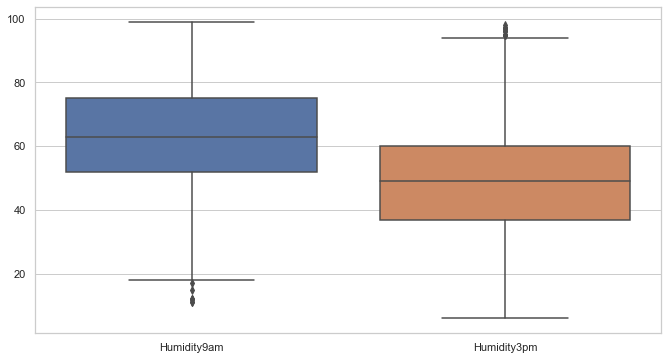

In [28]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Humidity9am','Humidity3pm']])

<AxesSubplot:>

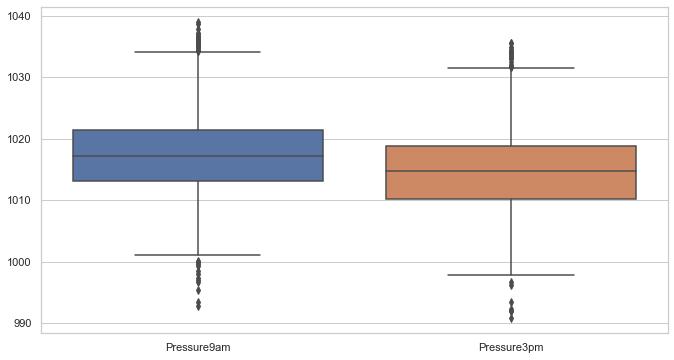

In [29]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Pressure9am','Pressure3pm']])

<AxesSubplot:>

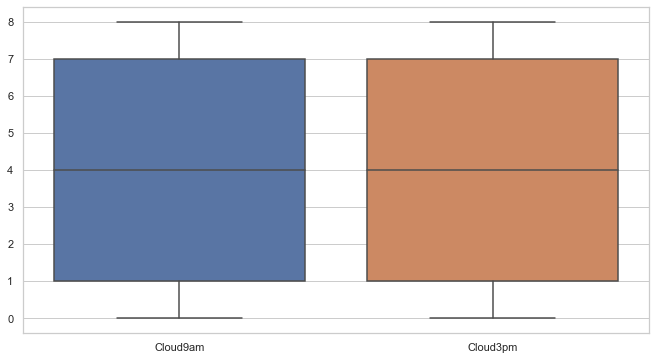

In [30]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_final[['Cloud9am','Cloud3pm']])

<AxesSubplot:>

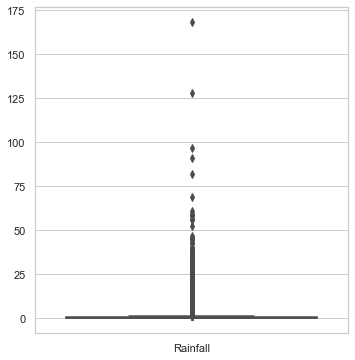

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=data_final[['Rainfall']])

<AxesSubplot:>

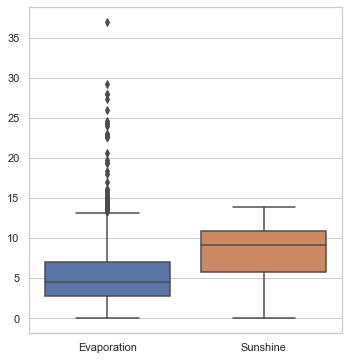

In [32]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=data_final[['Evaporation','Sunshine']])

# 2. Now Need to do Data pre-processing and Feature engineering

In [33]:
WindGustDir_encode = LabelEncoder()
data_final['WindGustDir']=WindGustDir_encode.fit_transform(data_final['WindGustDir'])

WindDir9am_encode = LabelEncoder()
data_final['WindDir9am']=WindDir9am_encode.fit_transform(data_final['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
data_final['WindDir3pm']=WindDir3pm_encode.fit_transform(data_final['WindDir3pm'])

RainToday_encode = LabelEncoder()
data_final['RainToday']=RainToday_encode.fit_transform(data_final['RainToday'])

RainTomorrow_encode = LabelEncoder()
data_final['RainTomorrow']=RainTomorrow_encode.fit_transform(data_final["RainTomorrow"])

In [34]:

Y= data_final['RainTomorrow']
X = data_final.drop(['RainTomorrow'],axis=1)

In [35]:
column_names=X.columns.tolist()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.80,shuffle=False)

In [37]:
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
def plotErrors(k,train,cv):
       
    plt.plot(k, train, label='Train logloss')
    plt.plot(k, cv, label='CV logloss')
    plt.legend()
    plt.xlabel("log(C)= -log(λ)")
    plt.ylabel("Neg_Log Loss")
    plt.title("Error Plot for Train and Validation data")
    plt.grid()
    plt.show()

# 3. Modeling the data using Logisitic Regression

# Hyper-parameter tuning

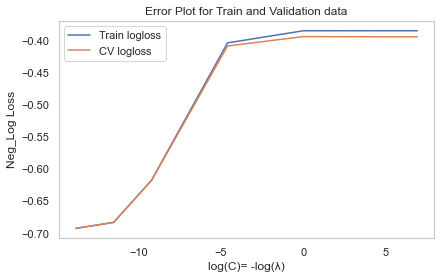

In [39]:
parameters={'C':[10**-6,10**-5,10**-4, 10**-2, 10**0, 10**2, 10**3] }
log_c = list(map(lambda x : float(math.log(x)),parameters['C']))

clf_log = LogisticRegression(penalty='l2',class_weight='balanced')

clf = GridSearchCV(clf_log, parameters, cv=5, scoring='neg_log_loss',return_train_score =True)
clf.fit(X_train, y_train)

train_loss= clf.cv_results_['mean_train_score']
cv_loss = clf.cv_results_['mean_test_score'] 

plotErrors(k=log_c,train=train_loss,cv=cv_loss)

In [40]:
clf = clf.best_estimator_
clf

LogisticRegression(C=1, class_weight='balanced')

In [41]:
#Trainig with the best value of C
clf.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced')

# Model Evaluating

In [42]:
#Printing the log-loss for both trian and test data
train_loss = log_loss(y_train, clf.predict_proba(X_train)[:,1])
test_loss  =log_loss(y_test, clf.predict_proba(X_test)[:,1])


print("Log_loss on train data is :{}".format(train_loss))
print("Log_loss on test data is :{}".format(test_loss))

Log_loss on train data is :0.3863798163677469
Log_loss on test data is :0.43672637391986846


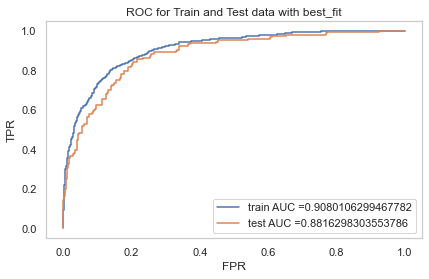

In [54]:
#Plotting AUC 
train_fpr, train_tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC for Train and Test data with best_fit")
plt.grid()
plt.show()

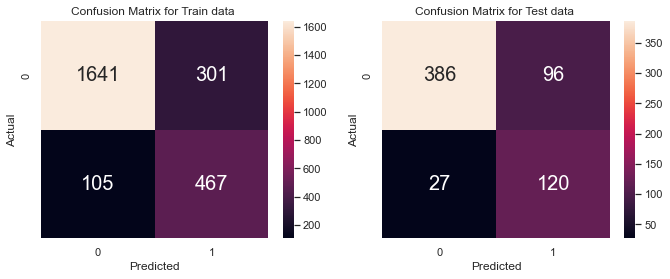

In [66]:
#ploting Confusion matrix
#Ref:https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785
def plotcm (cm,ax,title):
    sns.heatmap(cm, ax=ax,annot=True,fmt='d',annot_kws={'size':20},yticklabels=3);
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Actual'); 
    ax.set_title('Confusion Matrix for {} '.format(title)); 
    #ax.xaxis.set_ticklabels(['NO', 'YES']); 
   # ax.yaxis.set_ticklabels(['NO', 'YES']);


fig, subplt = plt.subplots(1, 2,figsize=(10, 4)) 
cm=confusion_matrix(y_train, clf.predict(X_train))
ax= subplt[0]
plotcm(cm,ax,'Train data')

cm=confusion_matrix(y_test, clf.predict(X_test))
ax= subplt[1]
plotcm(cm,ax,'Test data')

# Feature interpretation

In [45]:
clf.coef_[0]

array([-0.57481165, -0.1688989 ,  0.32541028,  0.08186004, -0.6785046 ,
        0.06503254,  0.88215859,  0.18651383, -0.14334502, -0.13891651,
       -0.01872926,  0.06522535,  1.37428317,  0.54723017, -0.87112431,
       -0.10884613,  0.4746166 ,  0.10788152,  0.57508143,  0.24457617])

In [46]:
feature_weights=sorted(zip(clf.coef_[0],column_names),reverse = True)

In [47]:
feature_weights

[(1.3742831736491488, 'Humidity3pm'),
 (0.882158594759338, 'WindGustSpeed'),
 (0.5750814324455122, 'Temp3pm'),
 (0.5472301662935872, 'Pressure9am'),
 (0.4746165983729062, 'Cloud3pm'),
 (0.32541028294379615, 'Rainfall'),
 (0.24457617048997188, 'RainToday'),
 (0.18651382833333585, 'WindDir9am'),
 (0.10788151865665563, 'Temp9am'),
 (0.08186004492409489, 'Evaporation'),
 (0.06522534646693892, 'Humidity9am'),
 (0.06503254054221516, 'WindGustDir'),
 (-0.018729263410145705, 'WindSpeed3pm'),
 (-0.10884613484197775, 'Cloud9am'),
 (-0.13891651031851435, 'WindSpeed9am'),
 (-0.14334502207624078, 'WindDir3pm'),
 (-0.16889889601774677, 'MaxTemp'),
 (-0.574811645498289, 'MinTemp'),
 (-0.6785046019507562, 'Sunshine'),
 (-0.8711243068033437, 'Pressure3pm')]

In [48]:
def will_rain_fall_for_this_conditions(xq):
    
    xq["WindGustDir"]=WindGustDir_encode.transform([xq["WindGustDir"]])
    xq["WindDir9am"]=WindDir9am_encode.transform([xq["WindDir9am"]])
    xq["WindDir3pm"]=WindDir3pm_encode.transform([xq["WindDir3pm"]])
    xq["RainToday"]=RainToday_encode.transform([xq["RainToday"]])
    xq=np.array(list((xq.values())))
    final_xq = scaler.transform(xq.reshape(1, -1))
    chance=clf.predict_proba(final_xq)[:,1]
    if chance>=0.5:
        print("Yes, there is a {} % chance of rain can fall on tommorow ".format(chance*100))
    else:
        print("No, there is only {}% chance of rainfall hence we cannot expect rain on tommorow ".format(chance*100))
    print("Because today's Humidity at 3pm ={}%,Atmosphereic Pressure at 9am={}millibars,and Wind Gust Speed ={}km/hr, which are very good sign for rainfall"
          .format(Humidity3pm,Pressure9am,WindGustSpeed)) 

In [49]:
#Giving one query point here

MinTemp   = 26.2
MaxTemp   = 31.7
Rainfall   = 2.8
Evaporation   = 5.4
Sunshine   = 3.5
WindGustDir   = "NNW"
WindGustSpeed   = 57
WindDir9am   = "NNW"
WindDir3pm   = "NNW"
WindSpeed9am   = 20
WindSpeed3pm   = 13
Humidity9am   = 81
Humidity3pm   = 95
Pressure9am   = 1007.2
Pressure3pm   = 1006.1
Cloud9am   = 7
Cloud3pm   = 8
Temp9am   = 28.8
Temp3pm   = 25.4
RainToday   ="Yes"

In [50]:
point = [MinTemp,MaxTemp,Rainfall,
         Evaporation,Sunshine,WindGustDir,
         WindGustSpeed,WindDir9am,WindDir3pm,
         WindSpeed9am,WindSpeed3pm,Humidity9am,
         Humidity3pm,Pressure9am,Pressure3pm,
         Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday]

xq=dict()
for i,name in enumerate(column_names):
    xq[name]=point[i]

# Now Interpretting & Testing the Classifer result

In [51]:
will_rain_fall_for_this_conditions(xq)

Yes, there is a [99.2896096] % chance of rain can fall on tommorow 
Because today's Humidity at 3pm =95%,Atmosphereic Pressure at 9am=1007.2millibars,and Wind Gust Speed =57km/hr, which are very good sign for rainfall


# Model Saving

In [70]:
import pickle
filename= 'Rain_Analysis.pkl'
pickle.dump(xq,open (filename,'wb'))